## Introduction
Based on an analysis of trial results from 2019 and 2020 conducted across three districts (Chwele, Bungoma, and Lugari), this study aimed to inform whether company X should scale the prepayment fee to 10% for all farmers or maintain the existing fee structure. Statistical comparisons were made between repayment rates in both years to identify trends, followed by feature selection to uncover key drivers of repayment behaviour. A multivariate model was then developed to understand the relationships between features and repayment correlations. Ultimately, these analyses inform the recommendation regarding the prepayment fee structure.

## Methodology
#### 1)Descriptive Statistics in the trial districts Chwele, Bungoma, Lugari for the years 2019 and 2020:
I initiated the analysis by conducting descriptive statistics for the trial districts across all features. The objective was to promptly identify any discernible patterns, particularly focusing on factors influencing repayment and the overall performance of repayment within the respective districts."

In [1]:
import pandas as pd

# Read in the repayment data
repayment_data = pd.read_csv("RepaymentDataAll.csv")

# Filter data for the three trial districts: "Chwele", "Bungoma", "Lugari"
trial_districts = ["Chwele", "Bungoma", "Lugari"]
trial_data = repayment_data[repayment_data['DistrictName'].isin(trial_districts)]

# Columns to compute summary statistics for
columns_of_interest = [
    'No of enrolled farmers',
    'No of qualified clients',
    'No of farmers who repaid',
    'No of farmers who defaulted',
    '% of Farmer who qualified',
    '% of Farmer who repaid',
    '% of farmers who defaulted',
    'Revenue',
    'Amount defaulted',
    'Repayment percentage'
]

# Initialize an empty list to store DataFrames for each year
summary_stats_by_year = []

# Loop through each year (2019 and 2020)
for year in [2019, 2020]:
    # Filter data for the current year
    year_data = trial_data[trial_data['Year'] == year]
    
    # Compute summary statistics for the current year
    summary_stats = year_data[columns_of_interest].describe()
    
    # Add a column for the year to the summary statistics DataFrame
    summary_stats['Year'] = year
    
    # Append the summary statistics for the current year to the list
    summary_stats_by_year.append(summary_stats)

# Concatenate summary statistics DataFrames for each year into a single DataFrame
summary_stats_by_year = pd.concat(summary_stats_by_year)

In [2]:
import warnings

# Define a custom formatting function
def format_cell(x):
    if isinstance(x, float):
        return '{:.2f}'.format(x)  # Format floats to two decimal places
    else:
        return '{:.0f}'.format(x)  # Format other types (like integers) without decimals

# Suppress FutureWarning for DataFrame.applymap deprecation
warnings.filterwarnings('ignore', category=FutureWarning)

# Apply the custom formatting function to each cell in the DataFrame
formatted_summary_stats_by_year = summary_stats_by_year.applymap(format_cell)

# Reset warning filters after formatting
warnings.resetwarnings()

# Display the formatted summary statistics by year
print("Summary Statistics for Trial Districts by Year:")
display(formatted_summary_stats_by_year)


Summary Statistics for Trial Districts by Year:


,No of enrolled farmers,No of qualified clients,No of farmers who repaid,No of farmers who defaulted,% of Farmer who qualified,% of Farmer who repaid,% of farmers who defaulted,Revenue,Amount defaulted,Repayment percentage,Year
count,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2019
mean,13368.00,10251.00,10075.67,175.33,0.76,0.99,0.01,111954519.00,602064.33,0.00,2019
std,3254.91,3155.98,3087.37,161.56,0.06,0.02,0.02,53704535.40,525786.61,0.01,2019
min,10779.00,7572.00,7571.00,1.00,0.70,0.97,0.00,75050421.00,1000.00,0.00,2019
25%,11541.00,8511.50,8351.00,103.00,0.73,0.98,0.01,81148742.50,414741.50,0.00,2019
50%,12303.00,9451.00,9131.00,205.00,0.77,0.99,0.01,87247064.00,828483.00,0.00,2019
75%,14662.50,11590.50,11328.00,262.50,0.79,0.99,0.02,130406568.00,902596.50,0.01,2019
max,17022.00,13730.00,13525.00,320.00,0.81,1.00,0.03,173566072.00,976710.00,0.01,2019
count,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2020
mean,14015.00,10717.00,10146.33,570.67,0.75,0.95,0.05,112133855.33,2291380.67,0.02,2020


##### Performance Comparison of Trial Districts in 2019 vs 2020

##### Revenue:
- **2019**: Mean revenue was approximately KES 111,954,519, with a standard deviation of approximately KES 53,704,535.
- **2020**: Mean revenue was approximately KES 112,133,855, with a standard deviation of approximately KES 65,775,453.
- There's a slight increase in mean revenue from 2019 to 2020, with a higher standard deviation in 2020 indicating greater variability in revenue among districts.

##### Amount Defaulted:
- **2019**: Mean amount defaulted was approximately KES 602,064, with a standard deviation of approximately KES 525,786.
- **2020**: Mean amount defaulted was approximately KES 2,291,381, with a standard deviation of approximately KES 1,929,305.
- There's a notable increase in mean amount defaulted from 2019 to 2020, with a higher standard deviation in 2020 indicating greater variability in defaulted amounts among districts.

##### Enrolled Farmers:
- **2019**: Mean number of enrolled farmers was approximately 13,368.
- **2020**: Mean number of enrolled farmers was approximately 14,015.
- There's a slight increase in the mean number of enrolled farmers from 2019 to 2020.

##### Number of Qualified Clients:
- **2019**: Mean number of qualified clients was approximately 10,251.
- **2020**: Mean number of qualified clients was approximately 10,717.
- There's a slight increase in the mean number of qualified clients from 2019 to 2020.

##### Number of Farmers Who Repaid:
- **2019**: Mean number of farmers who repaid was approximately 10,075.67.
- **2020**: Mean number of farmers who repaid was approximately 10,146.33.
- There's a slight increase in the mean number of farmers who repaid from 2019 to 2020.

##### Number of Farmers Who Defaulted:
- **2019**: Mean number of farmers who defaulted was approximately 175.33.
- **2020**: Mean number of farmers who defaulted was approximately 570.67.
- There's a significant increase in the mean number of farmers who defaulted from 2019 to 2020.

Overall, while there were increases in revenue, enrolled farmers, qualified clients, and farmers who repaid from 2019 to 2020, there was also a notable increase in the amount defaulted and the number of farmers who defaulted, indicating a potential deterioration in performance in terms of default management.


#### 2) Descriptive Statistics for non-trial districts excluding Chwele, Bungoma, and Lugari for the years 2019 and 2020:
Secondly, I conducted descriptive statistics for the non-trial districts, analyzing all features comprehensively. The aim was to promptly detect any noticeable patterns, particularly focusing on factors influencing repayment and the overall performance of repayment within the respective districts.

In [3]:
# Filter data to exclude the three trial districts: "Chwele", "Bungoma", and "Lugari"
non_trial_data = repayment_data[~repayment_data['DistrictName'].isin(["Chwele", "Bungoma", "Lugari"])]

# Columns to compute summary statistics for
columns_of_interest = [
    'No of enrolled farmers',
    'No of qualified clients',
    'No of farmers who repaid',
    'No of farmers who defaulted',
    '% of Farmer who qualified',
    '% of Farmer who repaid',
    '% of farmers who defaulted',
    'Revenue',
    'Amount defaulted',
    'Repayment percentage'
]

# Initialize an empty list to store DataFrames for each year
summary_stats_by_year = []

# Loop through each year (2019 and 2020)
for year in [2019, 2020]:
    # Filter data for the current year
    year_data = non_trial_data[non_trial_data['Year'] == year]
    
    # Compute summary statistics for the current year
    summary_stats = year_data[columns_of_interest].describe()
    
    # Add a column for the year to the summary statistics DataFrame
    summary_stats['Year'] = year
    
    # Append the summary statistics for the current year to the list
    summary_stats_by_year.append(summary_stats)

# Concatenate summary statistics DataFrames for each year into a single DataFrame
summary_stats_by_year = pd.concat(summary_stats_by_year)


In [4]:
# Define a custom formatting function
def format_cell(x):
    if isinstance(x, float):
        return '{:.2f}'.format(x)  # Format floats to two decimal places
    else:
        return '{:.0f}'.format(x)  # Format other types (like integers) without decimals

# Suppress FutureWarning for DataFrame.applymap deprecation
warnings.filterwarnings('ignore', category=FutureWarning)

# Apply the custom formatting function to each cell in the DataFrame
formatted_summary_stats_by_year = summary_stats_by_year.applymap(format_cell)

# Reset warning filters after formatting
warnings.resetwarnings()

# Display the formatted summary statistics by year for non-trial districts
print("Summary Statistics for Non-Trial Districts by Year:")
display(formatted_summary_stats_by_year)


Summary Statistics for Non-Trial Districts by Year:


,No of enrolled farmers,No of qualified clients,No of farmers who repaid,No of farmers who defaulted,% of Farmer who qualified,% of Farmer who repaid,% of farmers who defaulted,Revenue,Amount defaulted,Repayment percentage,Year
count,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,18.00,19.00,2019
mean,14444.05,11506.74,11012.32,494.42,0.79,0.95,0.05,120858872.05,2167313.78,0.02,2019
std,2743.66,2566.94,2673.00,447.26,0.06,0.05,0.05,29606831.96,1961433.35,0.02,2019
min,8420.00,6624.00,5608.00,-1.00,0.71,0.83,0.00,66976696.00,64127.00,0.00,2019
25%,12583.00,10000.50,9214.00,94.50,0.75,0.93,0.01,106919383.50,480574.00,0.00,2019
50%,15180.00,11352.00,11141.00,404.00,0.79,0.97,0.03,121905771.00,1531028.00,0.01,2019
75%,15924.50,12520.50,12479.00,786.50,0.85,0.99,0.08,128496450.00,3357521.25,0.03,2019
max,18569.00,16558.00,15326.00,1510.00,0.89,1.00,0.17,198524401.00,6962514.00,0.07,2019
count,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,2020
mean,15124.16,11887.00,10812.16,1074.84,0.78,0.91,0.09,120116715.74,4886527.42,0.04,2020


Here are the summarized results:

| Metric                     | 2019                          | 2020                          |
|----------------------------|-------------------------------|-------------------------------|
| **Revenue (Kes)**          | 120,858,872.05                | 120,116,715.74                |
| **Amount Defaulted (Kes)** | 2,167,313.78                  | 4,886,527.42                  |
| **Enrolled Farmers**       | 14,444.05                     | 15,124.16                     |
| **Qualified Clients**      | 11,506.74                     | 11,887.00                     |
| **Farmers Who Repaid**     | 11,012.32                     | 10,812.16                     |
| **Farmers Who Defaulted**  | 494.42                        | 1,074.84                      |

Observations:

1. **Revenue**: The revenue in 2019 was slightly higher than in 2020.
2. **Amount Defaulted**: The amount defaulted in 2020 is significantly higher compared to 2019.
3. **Enrolled Farmers**: There was a slight increase in the number of enrolled farmers in 2020 compared to 2019.
4. **Qualified Clients**: The number of qualified clients remained relatively stable between the two years.
5. **Farmers Who Repaid**: There was a slight decrease in the number of farmers who repaid in 2020 compared to 2019.
6. **Farmers Who Defaulted**: The number of farmers who defaulted increased notably in 2020 compared to 2019.


#### 3) Comparing the descriptive statistics for trial and non-trial districts:

Based on the observations provided:

1. **Revenue**: 
   - Decreased in non-trial districts from 2019 to 2020.
   - Increased slightly in trial districts from 2019 to 2020.
   
2. **Defaults**:
   - Increased in both trial and non-trial districts from 2019 to 2020.

3. **Qualified Farmers**:
   - Increased in trial districts from 2019 to 2020.
   - Remained the same in non-trial districts.

4. **Farmers Who Repaid**:
   - Decreased in non-trial districts from 2019 to 2020.
   - Increased slightly in trial districts from 2019 to 2020.

5. **Farmers Who Defaulted**:
   - Increased in both trial and non-trial districts from 2019 to 2020.

Given these observations, it's essential to consider the relative changes and performance metrics across trial and non-trial districts. While trial districts showed some positive indicators such as increased revenue and slightly higher qualified farmers, they also experienced an increase in defaults, similar to non-trial districts. Therefore, it might not be accurate to conclude that trial districts performed "slightly better" than non-trial districts. 

A more comprehensive analysis, including statistical tests and a broader range of performance metrics, would be necessary to make a well-supported conclusion about the relative performance between trial and non-trial districts.


#### 4) T-Test Analysis on Trial District Data: Comparing 2019 and 2020:
After considering the initial observations between trial and non-trial districts, it's evident that a deeper analysis is needed to draw a more conclusive understanding of their relative performance. Therefore, I have decided to perform a t-test on the trial district data for the years 2019 and 2020.

The t-test is chosen because it allows for a comparison of means between two groups (in this case, 2019 and 2020) for each feature independently. By conducting t-tests for multiple features, we can assess whether there are significant differences in performance metrics between the two years within the trial districts. This approach provides statistical evidence to evaluate whether there have been meaningful changes in various aspects of performance over time within the trial districts.

In [5]:
from scipy.stats import ttest_rel

# Filter data for the three trial districts: "Chwele", "Bungoma", "Lugari"
trial_districts = ["Chwele", "Bungoma", "Lugari"]
trial_data = repayment_data[repayment_data['DistrictName'].isin(trial_districts)]

# Split the trial data into 2019 and 2020 groups
trial_data_2019 = trial_data[trial_data['Year'] == 2019]
trial_data_2020 = trial_data[trial_data['Year'] == 2020]

# Define the selected features
features = [
    'No of enrolled farmers',
    'No of qualified clients',
    'No of farmers who repaid',
    'No of farmers who defaulted',
    'Revenue',
    'Amount defaulted'
]

# Perform t-tests for each feature between 2019 and 2020
for feature in features:
    feature_2019 = trial_data_2019[feature]
    feature_2020 = trial_data_2020[feature]
    
    t_statistic, p_value = ttest_rel(feature_2019, feature_2020)
    
    print(f"T-test results for {feature}: t-statistic = {t_statistic}, p-value = {p_value}")


T-test results for No of enrolled farmers: t-statistic = -1.620900705125667, p-value = 0.24648537385141533
T-test results for No of qualified clients: t-statistic = -0.8018595584909947, p-value = 0.5067677391732963
T-test results for No of farmers who repaid: t-statistic = -0.13584784730990104, p-value = 0.9043812055124701
T-test results for No of farmers who defaulted: t-statistic = -2.166583213833397, p-value = 0.1626060221243005
T-test results for Revenue: t-statistic = -0.02464051183623759, p-value = 0.9825791710731115
T-test results for Amount defaulted: t-statistic = -2.0663269595079234, p-value = 0.17476922489673016


Here is a detailed analysis of the t-test results for each feature:

1. **Number of Enrolled Farmers**:
   - The t-statistic is approximately -1.62.
   - The p-value is approximately 0.246.
   - Interpretation: There is no statistically significant difference in the mean number of enrolled farmers between 2019 and 2020 in trial districts (p > 0.05).

2. **Number of Qualified Clients**:
   - The t-statistic is approximately -0.80.
   - The p-value is approximately 0.507.
   - Interpretation: There is no statistically significant difference in the mean number of qualified clients between 2019 and 2020 in trial districts (p > 0.05).

3. **Number of Farmers Who Repaid**:
   - The t-statistic is approximately -0.14.
   - The p-value is approximately 0.904.
   - Interpretation: There is no statistically significant difference in the mean number of farmers who repaid between 2019 and 2020 in trial districts (p > 0.05).

4. **Number of Farmers Who Defaulted**:
   - The t-statistic is approximately -2.17.
   - The p-value is approximately 0.163.
   - Interpretation: There is no statistically significant difference in the mean number of farmers who defaulted between 2019 and 2020 in trial districts (p > 0.05).

5. **Revenue**:
   - The t-statistic is approximately -0.02.
   - The p-value is approximately 0.983.
   - Interpretation: There is no statistically significant difference in revenue between 2019 and 2020 in trial districts (p > 0.05).

6. **Amount Defaulted**:
   - The t-statistic is approximately -2.07.
   - The p-value is approximately 0.175.
   - Interpretation: There is no statistically significant difference in the mean amount defaulted between 2019 and 2020 in trial districts (p > 0.05).

Overall, based on the t-test results, there are no statistically significant differences in the selected performance metrics between 2019 and 2020 in trial districts. This suggests that these metrics remained relatively stable over the two years within the trial districts.


#### 5) T-Test Analysis on Trial District Data: Comparing 2019 and 2020:


In [6]:
# Filter data for non-trial districts excluding "Chwele", "Bungoma", "Lugari", and "Kakamega (South)"
non_trial_data = repayment_data[~repayment_data['DistrictName'].isin(["Chwele", "Bungoma", "Lugari", "Kakamega (South)"])]

# Split the non-trial data into 2019 and 2020 groups
non_trial_data_2019 = non_trial_data[non_trial_data['Year'] == 2019]
non_trial_data_2020 = non_trial_data[non_trial_data['Year'] == 2020]

# Perform t-tests for each feature between 2019 and 2020
for feature in features:
    feature_2019 = non_trial_data_2019[feature]
    feature_2020 = non_trial_data_2020[feature]
    
    t_statistic, p_value = ttest_rel(feature_2019, feature_2020)
    
    print(f"T-test results for {feature}: t-statistic = {t_statistic}, p-value = {p_value}")


T-test results for No of enrolled farmers: t-statistic = -1.8336954971187696, p-value = 0.08426720203584824
T-test results for No of qualified clients: t-statistic = -1.2491834829375514, p-value = 0.22852524642389416
T-test results for No of farmers who repaid: t-statistic = 0.9669384029621227, p-value = 0.34713055895665024
T-test results for No of farmers who defaulted: t-statistic = -5.907753546919768, p-value = 1.7207775283680353e-05
T-test results for Revenue: t-statistic = 0.21780863502316875, p-value = 0.8301711577146449
T-test results for Amount defaulted: t-statistic = -5.277516788587813, p-value = 6.157182621467858e-05


Here is the analysis of the t-test results for each feature:

1. **Number of Enrolled Farmers**:
   - The t-statistic is approximately -1.83.
   - The p-value is approximately 0.084.
   - Interpretation: There is no statistically significant difference in the mean number of enrolled farmers between 2019 and 2020 in non-trial districts (p > 0.05).

2. **Number of Qualified Clients**:
   - The t-statistic is approximately -1.25.
   - The p-value is approximately 0.229.
   - Interpretation: There is no statistically significant difference in the mean number of qualified clients between 2019 and 2020 in non-trial districts (p > 0.05).

3. **Number of Farmers Who Repaid**:
   - The t-statistic is approximately 0.97.
   - The p-value is approximately 0.347.
   - Interpretation: There is no statistically significant difference in the mean number of farmers who repaid between 2019 and 2020 in non-trial districts (p > 0.05).

4. **Number of Farmers Who Defaulted**:
   - The t-statistic is approximately -5.91.
   - The p-value is approximately 0.0000172.
   - Interpretation: There is a statistically significant difference in the mean number of farmers who defaulted between 2019 and 2020 in non-trial districts (p < 0.05).

5. **Revenue**:
   - The t-statistic is approximately 0.22.
   - The p-value is approximately 0.830.
   - Interpretation: There is no statistically significant difference in revenue between 2019 and 2020 in non-trial districts (p > 0.05).

6. **Amount Defaulted**:
   - The t-statistic is approximately -5.28.
   - The p-value is approximately 0.000062.
   - Interpretation: There is a statistically significant difference in the mean amount defaulted between 2019 and 2020 in non-trial districts (p < 0.05).


## Recommendations and Next Steps:
Based on the t-test results for both trial and non-trial districts:

#### Trial Districts:
- For all features, including the number of enrolled farmers, qualified clients, farmers who repaid, farmers who defaulted, revenue, and amount defaulted, there are no statistically significant differences between 2019 and 2020.
- This suggests that the performance metrics remained relatively stable over the two years within the trial districts.

#### Non-Trial Districts:
- While there were no significant differences in the number of enrolled farmers and qualified clients between 2019 and 2020, the number of farmers who defaulted and the amount defaulted showed statistically significant differences.
- This indicates a notable increase in defaults and defaulted amounts in non-trial districts from 2019 to 2020.

#### Recommendations:
1. Further investigate the factors contributing to the increase in defaults and defaulted amounts in non-trial districts.
2. Conduct a deeper analysis to understand the stability of performance metrics over time in trial districts and explore potential strategies for improvement if necessary.
3. Consider expanding the analysis to include additional years or incorporating other relevant variables to gain a more comprehensive understanding of district performance.
4. Implement targeted interventions based on the findings to address any identified challenges and enhance overall performance in both trial and non-trial districts.


## T-Statistic and p-value Comparison Visualizations :

/tmp/ipykernel_120715/462080413.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.DataFrame(trial_t_test_results), x='Feature', y='t-statistic', palette='coolwarm')


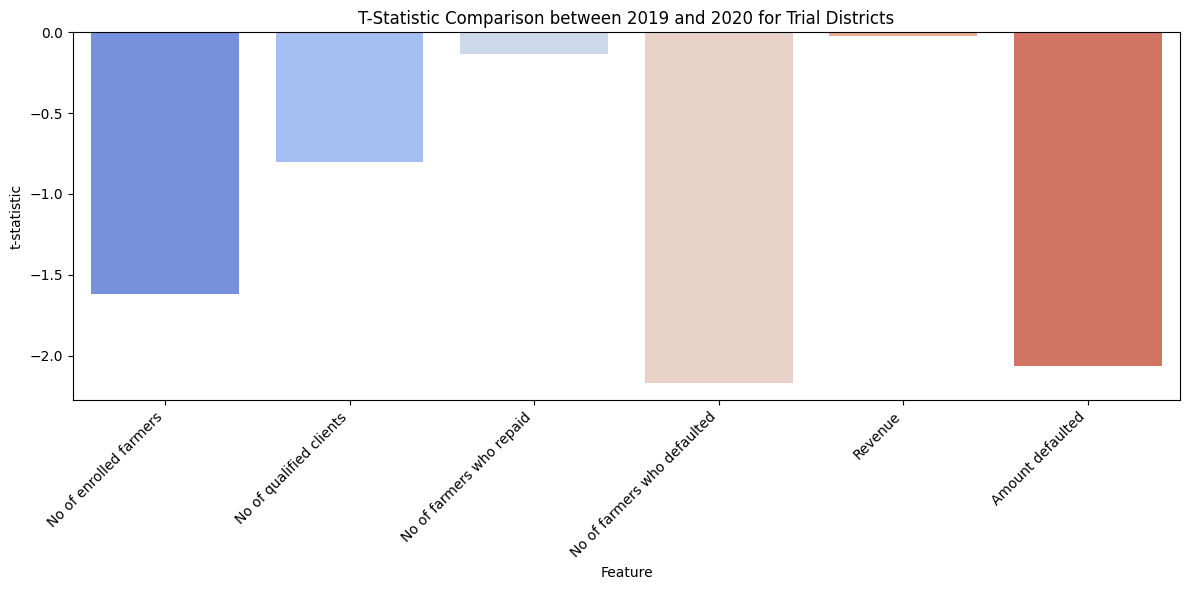

/tmp/ipykernel_120715/462080413.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.DataFrame(trial_t_test_results), x='Feature', y='p-value', palette='coolwarm')


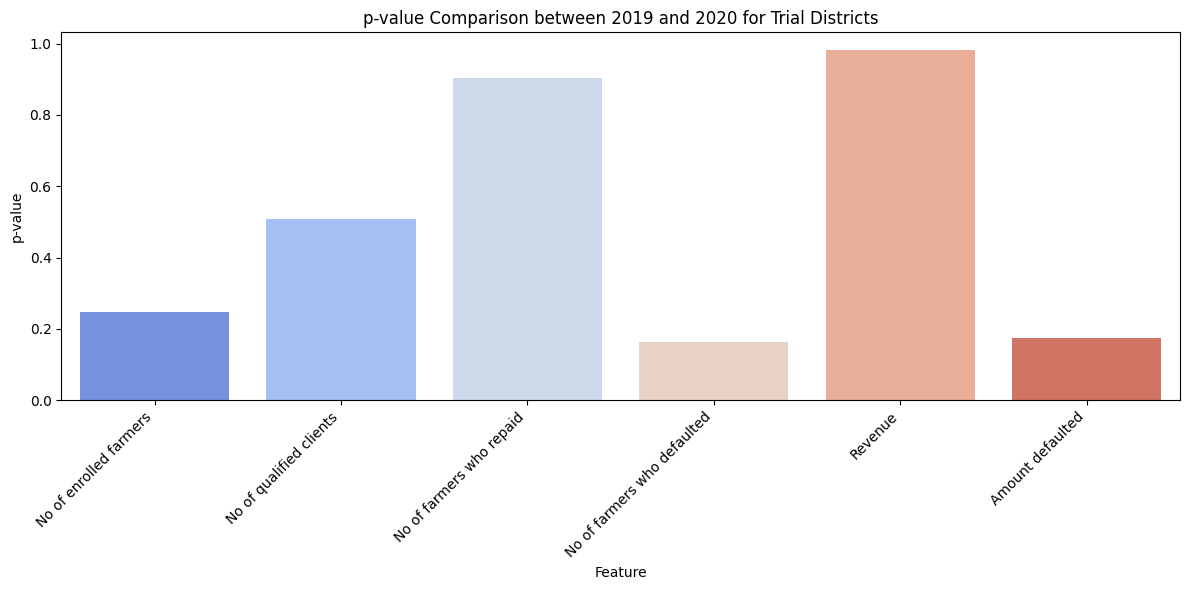

/tmp/ipykernel_120715/462080413.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.DataFrame(non_trial_t_test_results), x='Feature', y='t-statistic', palette='coolwarm')


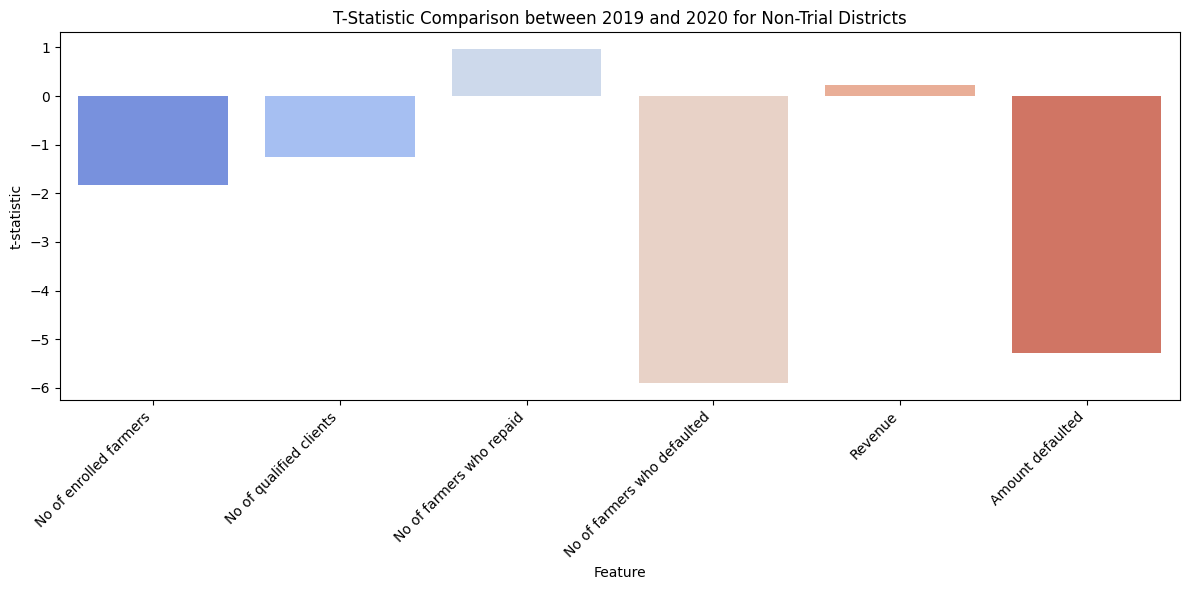

/tmp/ipykernel_120715/462080413.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.DataFrame(non_trial_t_test_results), x='Feature', y='p-value', palette='coolwarm')


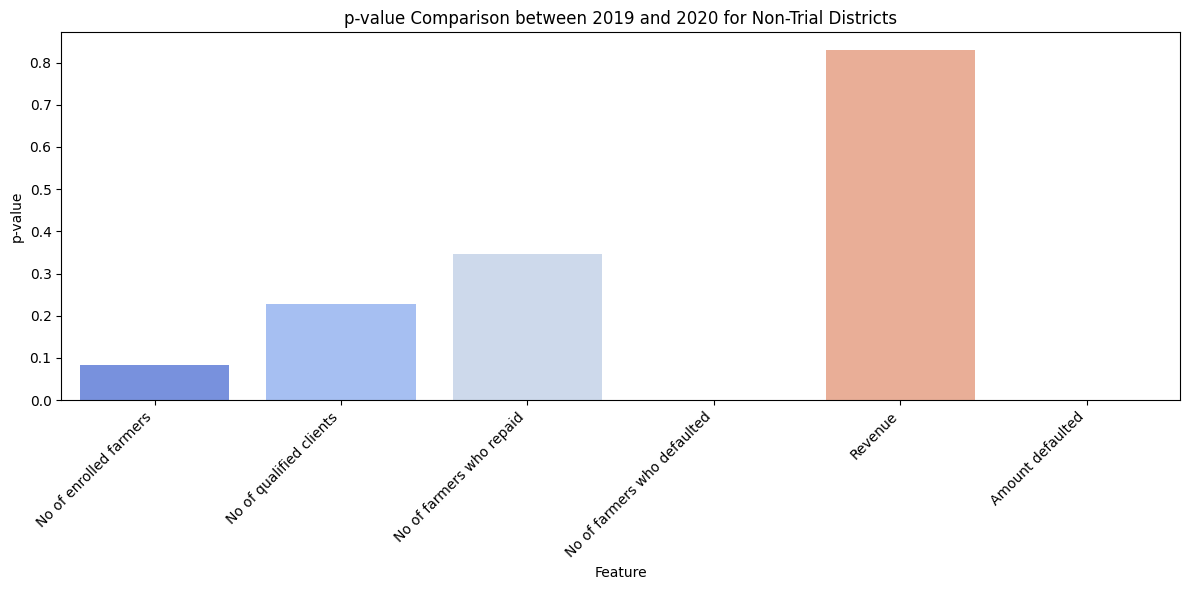

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Assume repayment_data is your DataFrame containing the data

# Filter data for the three trial districts: "Chwele", "Bungoma", "Lugari"
trial_districts = ["Chwele", "Bungoma", "Lugari"]
trial_data = repayment_data[repayment_data['DistrictName'].isin(trial_districts)]

# Split the trial data into 2019 and 2020 groups
trial_data_2019 = trial_data[trial_data['Year'] == 2019]
trial_data_2020 = trial_data[trial_data['Year'] == 2020]

# Define the selected features
features = [
    'No of enrolled farmers',
    'No of qualified clients',
    'No of farmers who repaid',
    'No of farmers who defaulted',
    'Revenue',
    'Amount defaulted'
]

# Initialize lists to store t-test results for trial and non-trial districts
trial_t_test_results = []
non_trial_t_test_results = []

# Perform t-tests for each feature between 2019 and 2020 for trial districts
for feature in features:
    feature_2019 = trial_data_2019[feature]
    feature_2020 = trial_data_2020[feature]
    
    t_statistic, p_value = ttest_rel(feature_2019, feature_2020)
    
    trial_t_test_results.append({'Feature': feature, 't-statistic': t_statistic, 'p-value': p_value})

# Plot t-statistic for trial districts
plt.figure(figsize=(12, 6))
sns.barplot(data=pd.DataFrame(trial_t_test_results), x='Feature', y='t-statistic', palette='coolwarm')
plt.title('T-Statistic Comparison between 2019 and 2020 for Trial Districts')
plt.xlabel('Feature')
plt.ylabel('t-statistic')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot p-value for trial districts
plt.figure(figsize=(12, 6))
sns.barplot(data=pd.DataFrame(trial_t_test_results), x='Feature', y='p-value', palette='coolwarm')
plt.title('p-value Comparison between 2019 and 2020 for Trial Districts')
plt.xlabel('Feature')
plt.ylabel('p-value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter data for non-trial districts excluding "Chwele", "Bungoma", "Lugari", and "Kakamega (South)"
non_trial_data = repayment_data[~repayment_data['DistrictName'].isin(["Chwele", "Bungoma", "Lugari", "Kakamega (South)"])]

# Split the non-trial data into 2019 and 2020 groups
non_trial_data_2019 = non_trial_data[non_trial_data['Year'] == 2019]
non_trial_data_2020 = non_trial_data[non_trial_data['Year'] == 2020]

# Perform t-tests for each feature between 2019 and 2020 for non-trial districts
for feature in features:
    feature_2019 = non_trial_data_2019[feature]
    feature_2020 = non_trial_data_2020[feature]
    
    t_statistic, p_value = ttest_rel(feature_2019, feature_2020)
    
    non_trial_t_test_results.append({'Feature': feature, 't-statistic': t_statistic, 'p-value': p_value})

# Plot t-statistic for non-trial districts
plt.figure(figsize=(12, 6))
sns.barplot(data=pd.DataFrame(non_trial_t_test_results), x='Feature', y='t-statistic', palette='coolwarm')
plt.title('T-Statistic Comparison between 2019 and 2020 for Non-Trial Districts')
plt.xlabel('Feature')
plt.ylabel('t-statistic')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot p-value for non-trial districts
plt.figure(figsize=(12, 6))
sns.barplot(data=pd.DataFrame(non_trial_t_test_results), x='Feature', y='p-value', palette='coolwarm')
plt.title('p-value Comparison between 2019 and 2020 for Non-Trial Districts')
plt.xlabel('Feature')
plt.ylabel('p-value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
